In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 18 octobre 2023, 11h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Imane SI SALAH

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd

%matplotlib notebook

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [67]:
fs, sig = scipy.io.wavfile.read("le_monde_nocturne.wav")
ipd.Audio(data=sig, rate= fs)

In [68]:
print("the shape of the signal is:", sig.shape)
print ("its type is: ", type(sig))
print("the rate of the signal is: ", fs)

# totale duration of the signal is
T= (len(sig)-1)/fs
print(f"duraion of the signal is: {T}s" )

the shape of the signal is: (427008,)
its type is:  <class 'numpy.ndarray'>
the rate of the signal is:  32000
duraion of the signal is: 13.34396875s


<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

    
<div> We have from lecture: <br>
 DSP de la voix de support [50Hz, 22kHz] avec le gros de la puissance < 3kHz</div>

Text(0.5, 1.0, 'Audio signal in time domain')

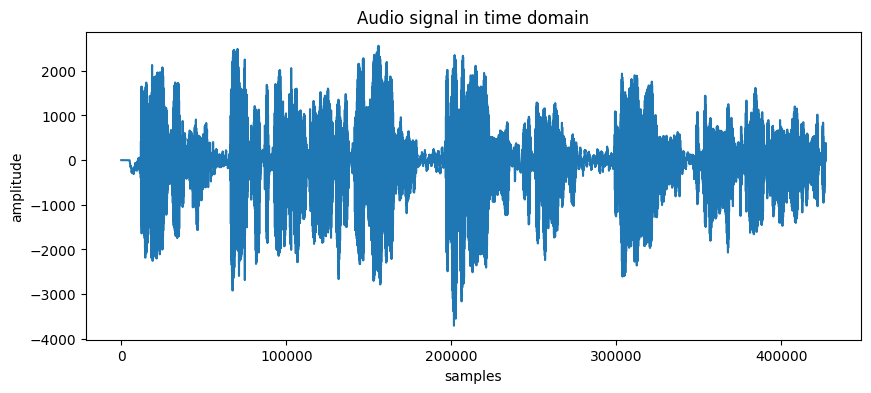

In [69]:
# signal visualization:
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.plot(sig)
plt.xlabel("samples")
plt.ylabel("amplitude")
plt.title("Audio signal in time domain")


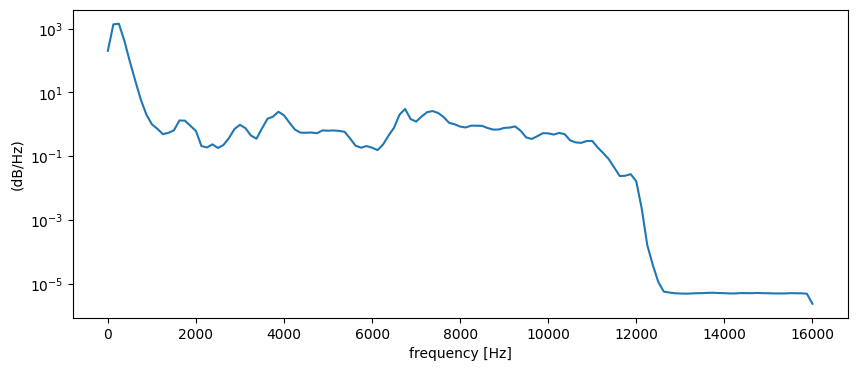

In [70]:
# compute the PSD
(f, PSD)= scipy.signal.welch(sig, fs, scaling='density')
plt.figure(figsize=(10, 4))
plt.semilogy(f, PSD) #make a plot with a log scaling on the y axis
plt.xlabel('frequency [Hz]')
plt.ylabel('(dB/Hz)')
plt.show()

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

C:\Users\imane\AppData\Local\Temp\ipykernel_30696\2200414673.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f,10 * np.log10(Sxx), shading='auto')


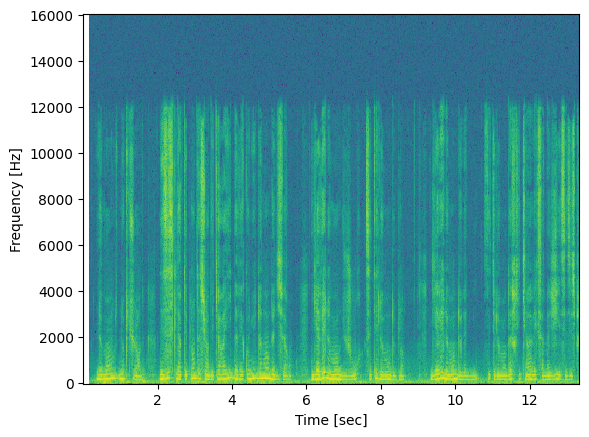

In [71]:
f, t, Sxx = scipy.signal.spectrogram(sig, fs, nperseg=620, noverlap=256)
plt.pcolormesh(t, f,10 * np.log10(Sxx), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.
    </div>

640


C:\Users\imane\AppData\Local\Temp\ipykernel_30696\2777558092.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  pitch = fs/optimal_lag


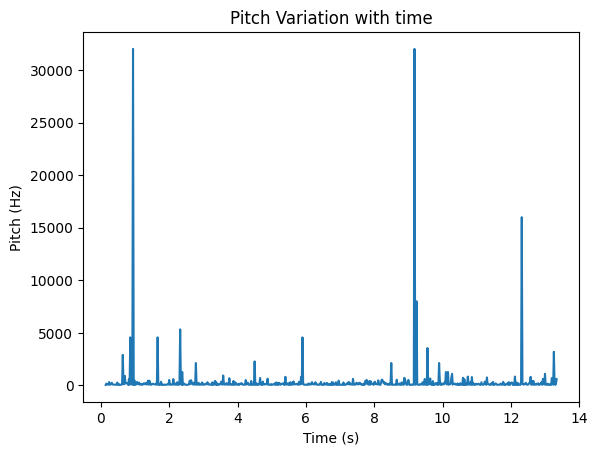

In [72]:
# use autocorrelation for pitch detection

def pitch_est(x,fs):
    ac = scipy.signal.correlate(x,x, mode='full')
    optimal_lag= np.argmax(ac)
    pitch = fs/optimal_lag
    return pitch


step = int(0.02 * fs)  # 20 ms/ no overlap
print(step)

pitch_values = []
lags= []
for i in range(0, len(sig), step):
  # Get the signal segment.
  signal_segment = sig[i:i + step]

  # Calculate the pitch of the signal segment.
  pitch= pitch_est(signal_segment, fs)
  lag= i/fs
  # Add the pitch to the list of pitch values.
  pitch_values.append(pitch)
  lags.append(lag)
# Plot the pitch values over time.
plt.plot(lags,pitch_values)
plt.xlabel("Time (s)")
plt.ylabel("Pitch (Hz)")
plt.title("Pitch Variation with time")
plt.show()


## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient un tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [73]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']
print(np.shape(signaux))
print(np.shape(labels))

(10000, 1000)
(10000,)


## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [74]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float):
    E= np.sum(x**2 for x in signal)

    if E>= seuil:
        return True
    elif E< seuil:
        return 0

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

 impulse signals: mean 282.1795219860511 and std 146.17591955299778
 non impulse signals: mean 191.74971188087636 and std 140.76350230853035


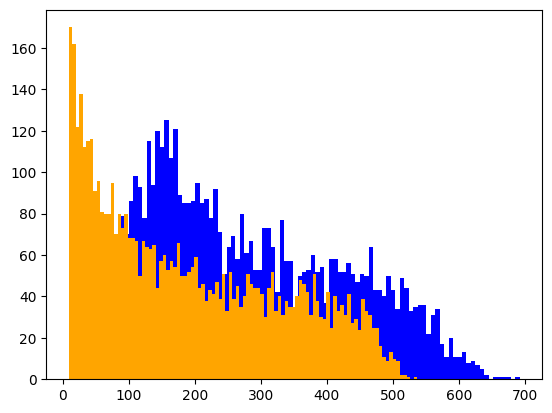

In [75]:
# to estimate the threshold I try to find the mean energy of signals containing an impulse or not
impulse_energy = [np.sum(segment**2) for i, segment in enumerate(signaux) if labels[i]]
non_impulse_energy = [np.sum(segment**2) for i, segment in enumerate(signaux) if not labels[i]]

mean_impulse = np.mean(impulse_energy)
std_impulse = np.std(impulse_energy)

mean_non_impulse = np.mean(non_impulse_energy)
std_non_impulse = np.std(non_impulse_energy)

print(f" impulse signals: mean {mean_impulse} and std {std_impulse}")
print(f" non impulse signals: mean {mean_non_impulse} and std {std_non_impulse}")
# try to visualise the distrition
plt.figure()

plt.hist(impulse_energy, bins= 100, color='blue')
plt.hist(non_impulse_energy,bins=100, color='orange')
plt.show()

In [76]:
#we see that both energy distributio have similar standard deviation so as an attempt we jsut take the middl of both but there will be a lot 
#missclassifcation
#thresh= np.mean([mean_impulse, mean_non_impulse])
threshold_multiplier =0.2   #modifiable
thresh_1 = mean_non_impulse + threshold_multiplier * std_non_impulse
print(f'the treshold is: {thresh_1}')

pred=[]
for i,x in enumerate(signaux):
    pred.append(contient_impulsion_energie(x,thresh_1))

the treshold is: 219.90241234258244


C:\Users\imane\AppData\Local\Temp\ipykernel_30696\2473668431.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  E= np.sum(x**2 for x in signal)


<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [77]:
#Calculate True Positives (VP)
VP_1 = np.sum(np.logical_and(labels, pred))

#Calculate False Positives (FP)
FP_1 = np.sum(np.logical_and(np.logical_not(labels), pred))

#Calculate True Negatives (VN)

VN_1 = np.sum(np.logical_and(np.logical_not(labels), np.logical_not(pred)))

#Calculate False Negatives (FN)
FN_1 = np.sum(np.logical_and(labels, np.logical_not(pred)))

#Output the results
print(f"True Positives (VP): {VP_1}")
print(f"False Positives (FP): {FP_1}")
print(f"True Negatives (VN): {VN_1}")
print(f"False Negatives (FN): {FN_1}")

True Positives (VP): 2881
False Positives (FP): 1945
True Negatives (VN): 3051
False Negatives (FN): 2123


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [78]:
#def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float):
from sklearn.metrics import accuracy_score


# Méthode 2 : Utilisation du spectrogramme avec un seuil
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    f, t, Sxx = scipy.signal.spectrogram(signal, fs=1000)
    # Trouver l'indice correspondant à la fréquence 100 Hz
    index_100Hz = np.argmax(f >= 100)
    # Trouver l'indice correspondant à la fréquence 200 Hz
    index_200Hz = np.argmax(f >= 200)
    # Calculer l'énergie spectrale dans la bande de fréquence d'intérêt
    energy_in_band = np.sum(Sxx[index_100Hz:index_200Hz, :], axis=0)
    if np.max(energy_in_band) > threshold:
        return True
    else:
        return False

# Estimer le seuil en fonction des caractéristiques des signaux
def mean_energy_in_band(signaux, labels, start_freq, end_freq):
    mean_energies = []
    for signal, label in zip(signaux, labels):
        f, t, Sxx = scipy.signal.spectrogram(signal, fs=1000)
        index_start = np.argmax(f >= start_freq)
        index_end = np.argmax(f >= end_freq)
        energy_in_band = np.mean(np.sum(Sxx[index_start:index_end, :], axis=0))
        mean_energies.append(energy_in_band) if label else None
    return np.mean(mean_energies)

# Calculate mean energies for impulse and non-impulse signals
mean_energy_impulse = mean_energy_in_band(signaux, labels, 100, 200)
mean_energy_non_impulse = mean_energy_in_band(signaux, np.logical_not(labels), 100, 200)

#THRESHOLD IS:
thresh_2= np.mean([mean_energy_impulse, mean_energy_non_impulse])
print('the threshold is: ', thresh_2)

pred_spec=[]
for i,x in enumerate(signaux):
    pred_spec.append(contient_impulsion_spectrogramme(x,thresh_2))


the threshold is:  0.021256932979506763


<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [79]:
#Calculate True Positives (VP)
VP_2 = np.sum(np.logical_and(labels, pred_spec))

#Calculate False Positives (FP)
FP_2 = np.sum(np.logical_and(np.logical_not(labels), pred_spec))

#Calculate True Negatives (VN)
VN_2 = np.sum(np.logical_and(np.logical_not(labels), np.logical_not(pred_spec)))

#Calculate False Negatives (FN)
FN_2 = np.sum(np.logical_and(labels, np.logical_not(pred_spec)))

#Output the results
print(f"True Positives (VP): {VP_2}")
print(f"False Positives (FP): {FP_2}")
print(f"True Negatives (VN): {VN_2}")
print(f"False Negatives (FN): {FN_2}")

True Positives (VP): 1874
False Positives (FP): 0
True Negatives (VN): 4996
False Negatives (FN): 3130


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{VP}{VP + FP}$$
et le rappel comme:
$$ \frac{VP}{VP +FN} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>
<div> <br></br>La précision évalue la capacité du modèle à éviter de classer à tort des échantillons négatifs en tant que positifs, tandis que le rappel évalue la capacité du modèle à identifier tous les échantillons positifs</div>

In [80]:
# Calcul de la précision, is the ture positive rate or the accuracy
precisions = [VP_1 / (VP_1 + FP_1), VP_2 / (VP_2 + FP_2)]

# Calcul du rappel
recalls = [VP_1 / (VP_1 + FN_1), VP_2 / (VP_2 + FN_2)]

# Affichage des résultats
print(f"La précision  pour la methode 1 est : {precisions[0]}, et pour la methode 2 : {precisions[1]}")
print(f"Le rappel pour la methode 1 est : {recalls[0]}, et pour la methode 2 : {recalls[1]}")

La précision  pour la methode 1 est : 0.59697472026523, et pour la methode 2 : 1.0
Le rappel pour la methode 1 est : 0.5757394084732215, et pour la methode 2 : 0.3745003996802558


<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

In [81]:
precisions, recalls = [], []

threshold_values = np.linspace(216 - 20, 216 + 20, num=10)

for thresh in threshold_values:
    pred = [contient_impulsion_energie(x, thresh) for x in signaux]
    pred_spec = [contient_impulsion_spectrogramme(x, thresh/10e4) for x in signaux]

    VP_1 = np.sum(np.logical_and(labels, pred))
    FP_1 = np.sum(np.logical_and(np.logical_not(labels), pred))
    FN_1 = np.sum(np.logical_and(labels, np.logical_not(pred)))

    VP_2 = np.sum(np.logical_and(labels, pred_spec))
    FP_2 = np.sum(np.logical_and(np.logical_not(labels), pred_spec))
    FN_2 = np.sum(np.logical_and(labels, np.logical_not(pred_spec)))

    precisions.append([VP_1 / (VP_1 + FP_1), VP_2 / (VP_2 + FP_2)])
    recalls.append([VP_1 / (VP_1 + FN_1), VP_2 / (VP_2 + FN_2)])

# Transpose the lists to ensure consistent shape
precisions = np.array(precisions).T
recalls = np.array(recalls).T

C:\Users\imane\AppData\Local\Temp\ipykernel_30696\2473668431.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  E= np.sum(x**2 for x in signal)


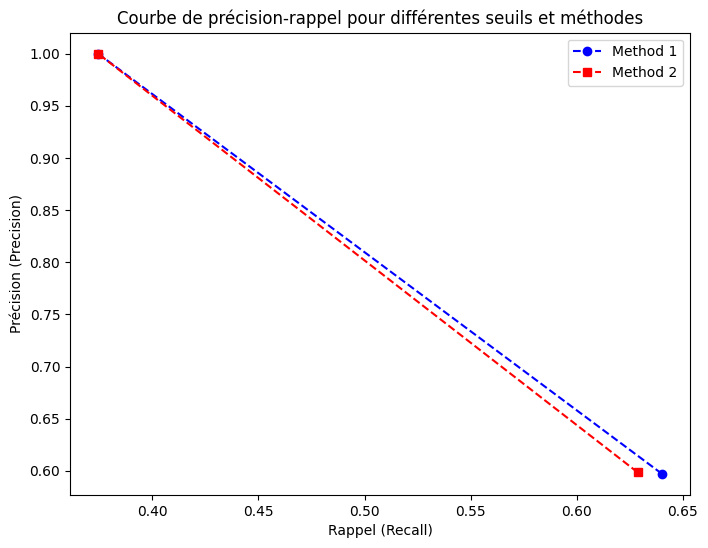

In [82]:

# Plot the precision-recall figures for both methods
plt.figure(figsize=(8, 6))
plt.plot(recalls[:, 0], precisions[:, 0], marker='o', linestyle='--', color='b', label='Method 1')
plt.plot(recalls[:, 1], precisions[:, 1], marker='s', linestyle='--', color='r', label='Method 2')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe de précision-rappel pour différentes seuils et méthodes')
plt.legend()
plt.show()